In [136]:
import json
import pandas as pd
from energyid import JSONClient
from datetime import datetime

example json
```json
{
  "EnergyID_CLIENTID": "ID",
  "EnergyID_CLIENTSECRET": "SECRET",
  "EnergyID_USERNAME": "USERNAME",
  "EnergyID_PASSWORD": "PASSWORD",
  "RECORDS": {
    "RECORD_1": "EA-NUMBER"
  }
}

```

In [137]:
# Load credentials (clientID, clientSecret, username, password) from json file
with open("secrets.json") as f:
    credentials = json.load(f)

In [138]:
# Create Client and init with client id and client secret

client = JSONClient(
    client_id=credentials["EnergyID_CLIENTID"],
    client_secret=credentials["EnergyID_CLIENTSECRET"],
)

In [139]:
# Login with username (email) and password

client.authenticate(
    username=credentials["EnergyID_USERNAME"], password=credentials["EnergyID_PASSWORD"]
)

In [ ]:
# Download a members info
# default member is ME

member = client.get_member()
member

In [ ]:
# Get all records for the member

records = member.get_records()
pd.DataFrame(records)

In [ ]:
# Select the first record

record = records[0]
pd.Series(record)

In [ ]:
# Get Energy Use data for the record

record.get_data(start="2023-01-01", end="2023-12-31", name="energyUse")
pd.Series(record)  # ['address']

In [ ]:
energy_use = record.get_data(
    name="energyUse",
    start="2023-01-01",
    end="2024-01-01",
    interval="PT15M",
    filter="electric",
    grouping="",
)
energy_use

## select second users data (admin)

In [ ]:
record2 = client.get_record(credentials["PRIVATE_EAN"])
energy_use2 = record2.get_data(
    name="energyUse",
    start="2023-01-01",
    end="2024-01-01",
    interval="PT15M",
    filter="electric",
)
energy_use2

### Quick examplary analysis

In [146]:
timestamps = [entry["timestamp"] for entry in energy_use2["value"][0]["data"]]
totals = [entry["total"] for entry in energy_use2["value"][0]["data"]]

datetime_timestamps = [datetime.fromisoformat(ts) for ts in timestamps]

energy_series = pd.Series(totals, index=datetime_timestamps)
display(energy_series)

2023-01-01 00:00:00+01:00    0.025
2023-01-01 00:15:00+01:00    0.017
2023-01-01 00:30:00+01:00    0.023
2023-01-01 00:45:00+01:00    0.024
2023-01-01 01:00:00+01:00    0.023
                             ...  
2023-12-31 22:45:00+01:00    0.024
2023-12-31 23:00:00+01:00    0.022
2023-12-31 23:15:00+01:00    0.046
2023-12-31 23:30:00+01:00    0.035
2023-12-31 23:45:00+01:00    0.027
Length: 35040, dtype: float64

In [147]:
# save the series to a json file
energy_series.to_json("energy_series.json")

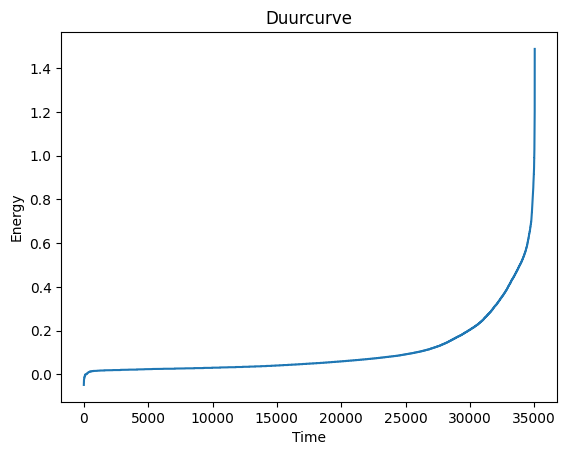

In [148]:
# Plot a duurcurve of the data
import matplotlib.pyplot as plt

plt.plot(energy_series.sort_values().reset_index(drop=True))
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Duurcurve")
plt.show()